In [2]:
import math
import random
import matplotlib.pyplot as plt

O resultado da classificação foi 0.964407880452375, portanto sou um girassol
O resultado da classificação foi 0.9639350664415379, portanto sou um girassol
O resultado da classificação foi 0.043854550631139265, portanto sou uma rosa
O resultado da classificação foi 0.9639713950922264, portanto sou um girassol
O resultado da classificação foi 0.044525551125623196, portanto sou uma rosa
O resultado da classificação foi 0.04344230130001605, portanto sou uma rosa
O resultado da classificação foi 0.04389415363958081, portanto sou uma rosa
O resultado da classificação foi 0.04539599245530103, portanto sou uma rosa
O resultado da classificação foi 0.9627194330195101, portanto sou um girassol
O resultado da classificação foi 0.04405994826559985, portanto sou uma rosa



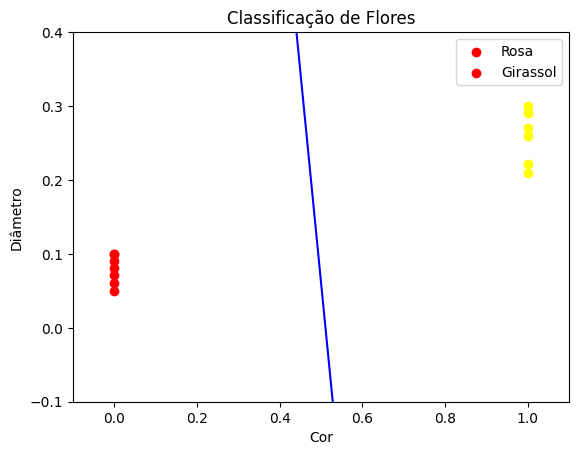

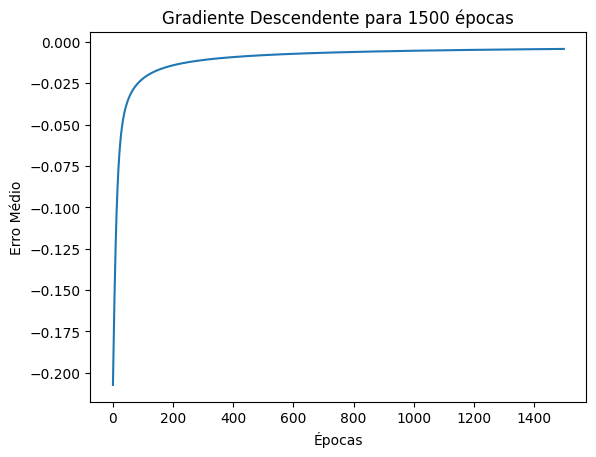

In [10]:
# Ativando a função sigmóide #
def sigmoide(x):
    return 1 / (1 + math.exp(-x))

# Função da derivada da sigmoide #
def sigmoide_derivada(x):
    return sigmoide(x) * (1 - sigmoide(x))

# Função que classifica as flores #
def classifica_flor(cor, diametro, pesos):
    weighted_sum = pesos[0] * cor + pesos[1] * diametro + pesos[2] # Calculando a soma ponderada
# Aplicando a função de ativação sigmoid
    output = sigmoide(weighted_sum)
    return output

# Mostrando padrões de flores para ensinar a rede neural, correspondente a x,y,z sendo cor, diametro, rótulo #
padroes_flor = [
    (1, 0.3, 1),  # Girassol Menor
    (0, 0.05, 0),  # Rosa
    (1, 0.27, 1),  # Girassol Menor
    (1, 0.21, 1),  # Girassol Menor
    (0, 0.061, 0),  # Rosa
    (0, 0.081, 0),  # Rosa
    (0, 0.069, 0),  # Rosa
    (1, 0.29, 1),  # Girassol menor
    (1, 0.271, 1),  # Girassol menor
    (0, 0.1, 0),  # Rosa
    (1, 0.26, 1),  # Girassol menor
    (0, 0.0518, 0)  # Rosa
]

# Gerando pesos aleatóriamente para o padrão x,y,z (cor, diametro, rótulo) #
pesos = [random.uniform(0.6, 0.8), random.uniform(0.2, 0.4), random.uniform(-1, 1)]

# Hiperparâmetros #
taxa_aprendizado = 0.1
epocas = 1500 # O número ideal de épocas é quando o erro se aproxima de zero #

# Armazenando os valores de erro numa lista vazia setada #
valores_erro = []

# Ensinando os neurônios com gradiente descendente #
for epoch in range(epocas):
    erro_total = 0
    for dados in padroes_flor:
        cor, diametro, rotulo = dados
        predicao = classifica_flor(cor, diametro, pesos) # Essa função cálcula a saída a ser prevista #
        erro = rotulo - predicao  # Calculando o erro total #
        erro_total += erro
        # ------------------------------------------------------ #
        # Cálculando as derivadas parciais com relação aos erros #
        gradiente_p1 = erro * cor * sigmoide_derivada(pesos[0] * cor + pesos[1] * diametro + pesos[2])
        gradiente_p2 = erro * diametro * sigmoide_derivada(pesos[0] * cor + pesos[1] * diametro + pesos[2])
        gradiente_b = erro * sigmoide_derivada(pesos[0] * cor + pesos[1] * diametro + pesos[2]) # Esse é o bias #
        # ------------------------------------------------------ #

        # ------------------------------------------------------------ #
        # Atualizando os pesos após os cálculos das derivadas parciais #
        pesos[0] += taxa_aprendizado * gradiente_p1
        pesos[1] += taxa_aprendizado * gradiente_p2
        pesos[2] += taxa_aprendizado * gradiente_b
        # ------------------------------------------------------------ #

    # ----------------------------------- #
    # Calculando a média do erro da época #
    media_erro = erro_total / len(padroes_flor)
    valores_erro.append(media_erro)
    # ----------------------------------- #
    
# Testando a rede neural #
dados_teste = [] # Lista vazia para os dados de teste #
num_teste = 10  # Número de testes #

# ------------------------------------------------------------------------------- #
# ------- Função para gerar valores aleatórios para testar a rede neural -------- #
for _ in range(num_teste):
    cor = random.randint(0, 1)
    if cor == 0:
        diametro = random.uniform(0.05, 0.1)  # Gerando um diâmetro para rosa entre 0.05 e 0.1 #
    else:
        diametro = random.uniform(0.2, 0.3)  # Gerando um diâmetro para girassol entre 0.2 e 0.3 #
    dados_teste.append((cor, diametro))
# ------------------------------------------------------------------------------- #

# Testando a rede neural treinada
for dados in dados_teste:
    cor, diametro = dados
    classificacao = classifica_flor(cor, diametro, pesos)
    if classificacao < 0.5:
        print(f"O resultado da classificação foi {classificacao}, portanto sou uma rosa")
    else:
        print(f"O resultado da classificação foi {classificacao}, portanto sou um girassol")
print("")
# --------------------------------------------------------- Gráficos ---------------------------------------------------------- #

# Definindo pontos com a classificação das flores #
rosas = [(0, 0.05), (0, 0.061), (0, 0.081), (0, 0.090), (0, 0.1), (0, 0.0718),(0,0.1)]
girassois = [(1, 0.3), (1, 0.27), (1, 0.21), (1, 0.29), (1, 0.221), (1, 0.26),(1,0.29)]

# Definindo os pontos da reta, com os pesos para mostrar o limite entre a separação de rosas e girassois conforme a rede neural #
x = [0, 1]
y = [(-pesos[0] * 0 - pesos[2]) / pesos[1], (-pesos[0] * 1 - pesos[2]) / pesos[1]]

# Plotando os pontos
for ponto in rosas:
    plt.scatter(ponto[0], ponto[1], color='red', marker='o')
for ponto in girassois:
    plt.scatter(ponto[0], ponto[1], color='yellow', marker='o')

# Configurando e plotando o gráfico da classificação de flores #
plt.plot(x, y, color='blue')
plt.xlabel('Cor')
plt.ylabel('Diâmetro')
plt.title('Classificação de Flores')
plt.legend(['Rosa', 'Girassol'])
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 0.4])
plt.show()

# Plotando o gráfico do gradiente descendente (erro x épocas) #
plt.plot(range(epocas), valores_erro)
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.title(f'Gradiente Descendente para {epocas} épocas')
plt.show()